In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from aging.plotting import format_plots, PlotConfig, save_factory, figure, legend, format_pizza_plots
from collections import Counter
from matplotlib.lines import Line2D
from tqdm import tqdm

In [2]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc
from operator import add
from tqdm.auto import tqdm
from functools import reduce
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.spatial.distance import squareform, pdist
from sklearn.metrics import silhouette_score
from aging.plotting import format_plots, figure, save_factory, PlotConfig, legend, add_identity
from sklearn.feature_selection import mutual_info_classif as MIC
from sklearn.feature_selection import mutual_info_regression as MIR

In [3]:
from matplotlib.colors import LinearSegmentedColormap
# Define the color map
colors = ['#d94801','white','#008C8D']
custom_cmap = LinearSegmentedColormap.from_list("custom_purples", colors, N=256)
cmmf=custom_cmap

colors = ['#dadaeb','#6a51a3']
custom_cmap = LinearSegmentedColormap.from_list("custom_purples", colors, N=256)
cma=custom_cmap

colors = ['white','gray']
custom_cmap = LinearSegmentedColormap.from_list("custom_purples", colors, N=256)
cma=custom_cmap

colors = ['#ccece6','#99d8c9','#66c2a4','#41ae76','#238b45','#006d2c']
cml = sns.blend_palette(colors, n_colors=256, as_cmap=True)

# Define the color map
colors = ['#fee6ce','#d94801']
custom_cmap = LinearSegmentedColormap.from_list("custom_purples", colors, N=256)
cmf=custom_cmap

colors = ['#c7eae5','#008C8D']
custom_cmap = LinearSegmentedColormap.from_list("custom_purples", colors, N=256)
cmm=custom_cmap

In [4]:
format_plots()

In [5]:
def mm_norm_col(column):
    return (column - column.min()) / (column.max() - column.min())

In [6]:
## arrange data
keep_syllables = np.loadtxt('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/to_keep_syllables_raw.txt', dtype=int)

male_df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/ontogeny_males_raw_usage_matrix_v00.parquet').astype(float)
male_df = male_df[keep_syllables]
m_df= male_df.groupby(['age','uuid']).mean()

In [ ]:
## arrange data for females
keep_syllables = np.loadtxt('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/to_keep_syllables_raw.txt', dtype=int)


## arrange data
#female_df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/ontogeny_females_raw_usage_matrix_v00.parquet').astype(float)
#female_df = female_df[keep_syllables]

female_df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11-1/ontogeny_females_raw_usage_matrix_v00.parquet').astype(float)
female_df = female_df[keep_syllables]


#female_df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/ontogeny_females_raw_usage_matrix_v01.parquet').astype(float)
#female_df = female_df[keep_syllables]

# for female:
f_df= female_df.groupby(['age','uuid']).mean()
# Update age value to 52 for rows with uuid in the list
# Update age value to 52 for rows with uuid in the list
uuids = ['f1d5dce5-f5cf-4b03-b07d-d9b8c1f034b0','6fa50ac7-6d49-4ef9-9059-3d90bdd8c5d4',
         'e9e05da8-fc59-40f3-a9c8-f57c492c6141','327e7fa1-2237-43d2-b25f-c1801912df33',
        '242bee8e-0ee7-45e7-8a13-678836a4cddb','552ec70f-0676-4471-8ab0-403e1fcf43e3','d6f254af-d55a-427a-96e0-c452a233cbe2']
#f_df.reset_index(inplace=True)

age_mapping = {
    93: 94,
    95: 94,
    97: 98,
    98: 98,
    102: 98,
    103: 105,
    105: 105,
    107: 105
}

f_df['age'] = f_df['age'].map(age_mapping).fillna(f_df['age'])
f_df.loc[f_df['uuid'].isin(uuids), 'age'] = 52
# Set the index back
#f_df.set_index(['age', 'uuid'], inplace=True)
f_df=f_df.query('age<127')

In [7]:
#average and normalize male
m_data=m_df.copy()
avg_m_df = m_data.groupby(['age']).mean()
# normalize the data
m_norm = mm_norm_col(m_data)
avg_m_norm = mm_norm_col(avg_m_df)

#average and normalize female
f_data=f_df.copy()
avg_f_df = f_data.groupby(['age']).mean()
# normalize the data
f_norm = mm_norm_col(f_data)
avg_f_norm = mm_norm_col(avg_f_df)
data=pd.concat([m_data,f_data])

In [8]:
## MI for age in ontogeny

In [9]:
X = m_norm.to_numpy()
y = list(m_data.index.get_level_values('age'))
mi_score_m = MIR(X,y)
mi_shf=[]

it=100
for i in tqdm(range(it)):
    ytemp = random.shuffle(y)
    mi_temp = MIR(X,y)
    mi_shf.extend(mi_temp)

  0%|          | 0/100 [00:00<?, ?it/s]

In [10]:
m_indx = np.argsort(mi_score_m)[::-1][0:len(keep_syllables)] # syllble index
impsyl_m= list(m_data.columns[m_indx]) #syllable id

In [11]:
# Create figure and axis
df = pd.DataFrame()
df['mi'] = np.concatenate((np.array(mi_score_m),
                      np.array(mi_shf)))

df['exp'] = np.concatenate((len(np.array(mi_score_m)) * ['m'],
                         len(np.array(mi_shf)) * ['shf']))

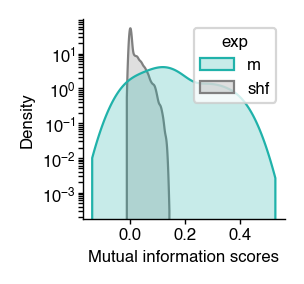

In [15]:
fig = plt.figure(figsize=(1.3, 1.3))
ax = fig.gca()
sns.kdeplot(data=df, x='mi', fill=True,palette = ['#20B2AA','gray'], hue = 'exp',common_norm=False,log_scale=False)
#plt.yscale('log')

#sns.displot(mi_score_m, kind="kde",fill=True,color = '#20B2AA',ax=ax)
#sns.displot(mi_shf, kind="kde",fill=True,color = 'gray',ax=ax)

plt.xlabel('Mutual information scores')
sns.despine()

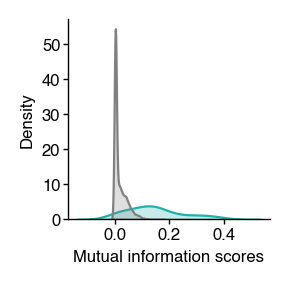

In [13]:
# Create figure and axis
fig = plt.figure(figsize=(1.3, 1.3))
ax = fig.gca()
sns.kdeplot(mi_score_m,fill=True,color = '#20B2AA',ax=ax)
sns.kdeplot(mi_shf, fill=True,color = 'gray',ax=ax)

#sns.displot(mi_score_m, kind="kde",fill=True,color = '#20B2AA',ax=ax)
#sns.displot(mi_shf, kind="kde",fill=True,color = 'gray',ax=ax)

plt.xlabel('Mutual information scores')
sns.despine()

In [14]:
c = PlotConfig()
fig.savefig(c.dana_save_path / "fig2"/ 'MI_dist_male.pdf', bbox_inches='tight')

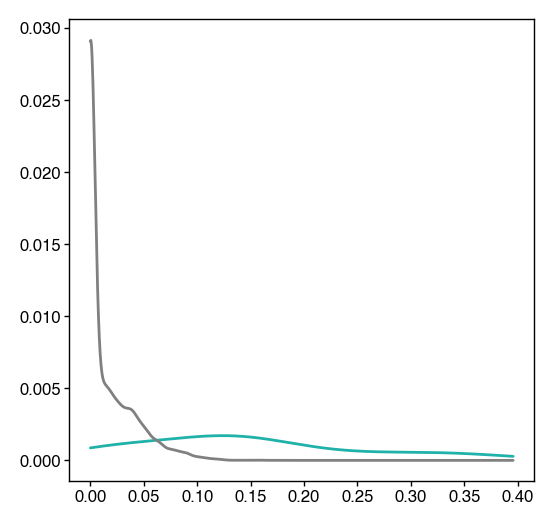

In [15]:
# Compute KDEs for both datasets
from scipy.stats import gaussian_kde
kde_mi_score_m = gaussian_kde(mi_score_m)
kde_mi_shf = gaussian_kde(mi_shf)

# Estimate the range of values to use for the x-axis
x_values = np.linspace(min(mi_score_m.min(), np.array(mi_shf).min()), max(mi_score_m.max(), np.array(mi_shf).max()), 1000)

# Evaluate the KDEs at the x_values
density_mi_score_m = kde_mi_score_m(x_values)
density_mi_shf = kde_mi_shf(x_values)

# Normalize densities to have the same area under the curve
density_mi_score_m /= density_mi_score_m.sum()
density_mi_shf /= density_mi_shf.sum()

# Plot normalized KDEs
plt.plot(x_values, density_mi_score_m, label='mi_score_m', color='#20B2AA')
plt.plot(x_values, density_mi_shf, label='mi_shf', color='gray')

In [16]:
X = f_norm.to_numpy()
y = list(f_data.index.get_level_values('age'))
mi_score_m = MIR(X,y)
mi_shf=[]

it=100
for i in tqdm(range(it)):
    ytemp = random.shuffle(y)
    mi_temp = MIR(X,y)
    mi_shf.extend(mi_temp)

  0%|          | 0/100 [00:00<?, ?it/s]

In [17]:
m_indx = np.argsort(mi_score_m)[::-1][0:len(keep_syllables)] # syllble index
impsyl_m= list(m_data.columns[m_indx]) #syllable id

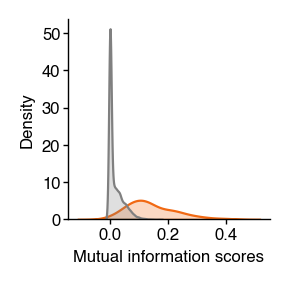

In [18]:
# Create figure and axis
fig = plt.figure(figsize=(1.3, 1.3))
ax = fig.gca()
sns.kdeplot(mi_score_m,fill=True,color = '#f16913',ax=ax)
sns.kdeplot(mi_shf, fill=True,color = 'gray',ax=ax)

#sns.displot(mi_score_m, kind="kde",fill=True,color = '#20B2AA',ax=ax)
#sns.displot(mi_shf, kind="kde",fill=True,color = 'gray',ax=ax)

plt.xlabel('Mutual information scores')
sns.despine()

In [19]:
c = PlotConfig()
fig.savefig(c.dana_save_path / "fig3"/ 'MI_dist_female.pdf', bbox_inches='tight')